911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Pennsylvania  
timeStamp is a string and not the normal date-time object  
last column : dummy  
Ctrl + Space in colab = Tab in Jupyter (Autocomplete attributes)

In [0]:
import numpy as np
import pandas as pd

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("911.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [10]:
df["zip"].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Top 5 zipcodes to receive maximum 911 emergency calls

In [11]:
df["twp"].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Top 5 townships to receive maximum 911 calls : Lower Merion, Abington, Norristown, Upper Merion, Cheltenham

In [16]:
df["title"].nunique()
# len(df["title"].unique())

110

110 types of emergency cases

In [17]:
df["title"][:5]

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In [0]:
def getReason(reason):
  return reason.split(":")[0]

In [20]:
getReason(df["title"][0])

'EMS'

In [0]:
df["reason"] = df["title"].apply(getReason)
# df["reason"] = df["title"].apply(lambda x: x.split(":")[0])
# In-place operation

Finding main departments in charge of the calls:  
EMS (emergency medical services)  
Fire   
Traffic

In [97]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,dayOfWeek,month,hour,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,12,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,12,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thu,12,17,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu,12,17,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu,12,17,2015-12-10


In [30]:
df["reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

Most common reason for 911 calls is EMS.

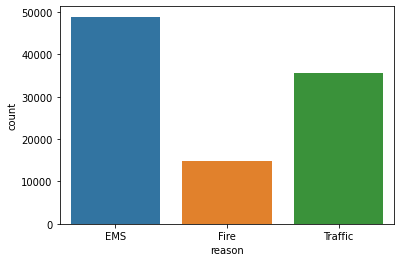

In [40]:
sns.countplot(df["reason"]) # Only need to pass the column, it counts by itself, don't need to pass count
# sns.countplot(x='reason', data = df) also correct
# Takes X axis as the index of the series (since df["reason"] gives series) automatically

In [125]:
df[df["reason"]=="Traffic"]["title"].value_counts()

Traffic: VEHICLE ACCIDENT -             23066
Traffic: DISABLED VEHICLE -              7702
Traffic: ROAD OBSTRUCTION -              3144
Traffic: HAZARDOUS ROAD CONDITIONS -     1086
Traffic: VEHICLE FIRE -                   553
Traffic: VEHICLE LEAKING FUEL -            77
Traffic: DEBRIS/FLUIDS ON HIGHWAY -        67
Name: title, dtype: int64

All kinds of traffic emergencies, calls were made for.  
Maximum cases are of vehicle accidents, followed by disabled vehicle, road obstruction and risky road conditions.

In [127]:
df[df["reason"]=="EMS"]["title"].value_counts()[:10]

EMS: RESPIRATORY EMERGENCY        5112
EMS: CARDIAC EMERGENCY            5012
EMS: FALL VICTIM                  4863
EMS: VEHICLE ACCIDENT             3935
EMS: SUBJECT IN PAIN              2687
EMS: HEAD INJURY                  2631
EMS: UNKNOWN MEDICAL EMERGENCY    1873
EMS: SYNCOPAL EPISODE             1717
EMS: SEIZURES                     1630
EMS: GENERAL WEAKNESS             1464
Name: title, dtype: int64

Top 10 reasons for EMS calls: Respiratory emergency, cardiac emergency, fall victim, vehicle accident, subject in pain, head injury

In [129]:
df[df["reason"]=="Fire"]["title"].value_counts()[:10]

Fire: FIRE ALARM                  5496
Fire: VEHICLE ACCIDENT            1638
Fire: FIRE INVESTIGATION          1460
Fire: GAS-ODOR/LEAK               1028
Fire: BUILDING FIRE                807
Fire: FIRE SPECIAL SERVICE         666
Fire: ELECTRICAL FIRE OUTSIDE      622
Fire: CARBON MONOXIDE DETECTOR     575
Fire: VEHICLE FIRE                 516
Fire: WOODS/FIELD FIRE             514
Name: title, dtype: int64

In [45]:
type(df["timeStamp"].iloc[1])
# extract first row of the series
# Not df["timeStamp"].dtype

str

In [0]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

Convert time from string to timestamp

In [50]:
type(df["timeStamp"].iloc[1])

pandas._libs.tslibs.timestamps.Timestamp

Split to 3 columns - hour, month, day of week

In [0]:
time = df["timeStamp"].iloc[0]

In [55]:
print("Day of week", time.dayofweek)
print("Hour",time.hour)
print("Month", time.month)

Day of week 3
Hour 17
Month 12


In [0]:
dayOfWeek = df["timeStamp"].apply(lambda x: x.dayofweek)
hour = df["timeStamp"].apply(lambda x: x.hour)
month = df["timeStamp"].apply(lambda x: x.month)

In [65]:
dayOfWeek

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: timeStamp, Length: 99492, dtype: int64

In [0]:
def convert(x):
  if(x==0):
    return "Mon"
  elif(x==1):
    return "Tue"
  elif(x==2):
    return "Wed"
  elif(x==3):
    return "Thu"
  elif(x==4):
    return "Fri"
  elif(x==5):
    return "Sat"
  else:
    return "Sun"
    
dayOfWeek = pd.Series(map(convert, dayOfWeek))

In [67]:
dayOfWeek

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Length: 99492, dtype: object

In [0]:
df["dayOfWeek"] = dayOfWeek
df["month"] = month
df["hour"] = hour

TODO: 


*   Analyse during which month max. emergency calls
*   And during which part of the day (hour)



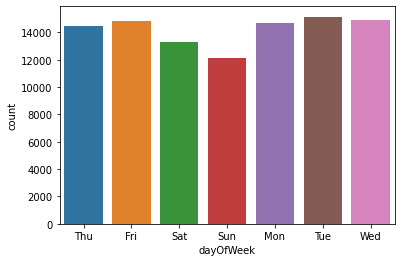

In [70]:
sns.countplot(x = "dayOfWeek", data = df)

Minimum cases on Sunday. Saturday has fewer cases too. Thus the number of emergency calls are less on weekends.  
All other days have more or less the same number of calls.

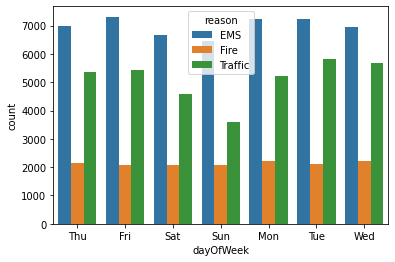

In [75]:
sns.countplot(x = "dayOfWeek", hue="reason", data=df)
# Therefore 3d plot, since 3rd dimension is the reason

Number of fire cases are the least, while that of the EMS the most on any day of the week.  
Traffic is least on Sunday (lesser on weekends) and maximum on Tuesday.  

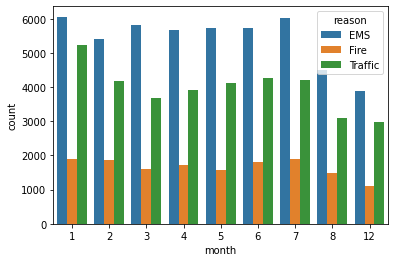

In [76]:
sns.countplot(x = "month", hue="reason", data=df)

In [77]:
df["month"].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8])

Note that the months: 9, 10, 11 are not present in the data. This means that the number of calls during these months (September, October, November) in the data we have are zero.

In [0]:
newdf = df.groupby("month").count()

In [82]:
newdf.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,dayOfWeek,hour
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Maximum number of calls in January, followed by February, March, April and May.

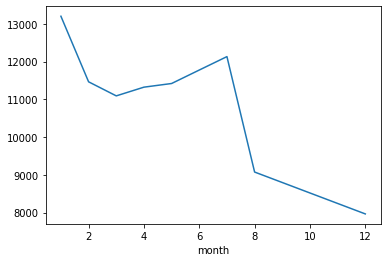

In [98]:
# Any column is fine, all have the same values since each just gives the count of the number of records that have that specific month
newdf["twp"].plot()

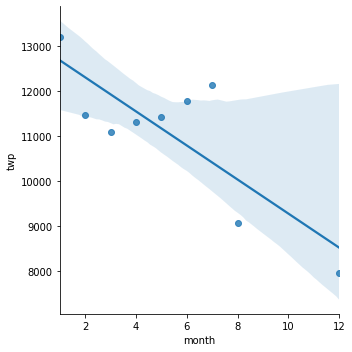

In [87]:
sns.lmplot(x='month', y='twp', data = newdf.reset_index())

In [0]:
df["date"] = df["timeStamp"].apply(lambda x: x.date())

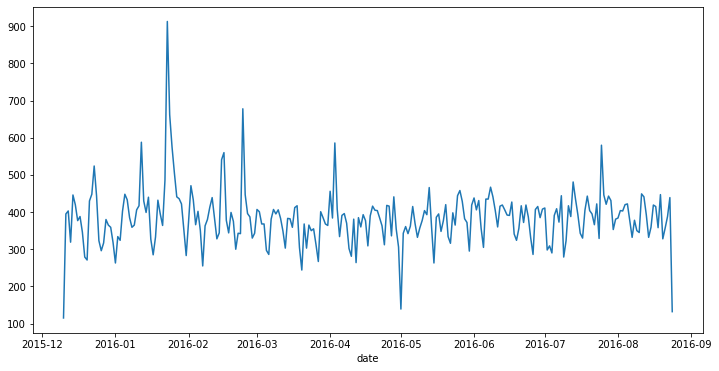

In [132]:
plt.figure(figsize = (12,6))
df.groupby("date").count()["twp"].plot.line()
# Just normal plot (line)
# plt.tight_layout()

In [109]:
df[df["reason"]=="Fire"].groupby("date").count()
# Have to specify .count() i.e. which attribute you want to access in the grouped data
# .groupby just brings them together will all kinds of attributes: count, mean, sum, std, etc

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,dayOfWeek,month,hour
date,,,,,,,,,,,,,
2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15
2015-12-11,69,69,69,59,69,69,68,68,69,69,69,69,69
2015-12-12,68,68,68,53,68,68,68,68,68,68,68,68,68
2015-12-13,51,51,51,48,51,51,51,51,51,51,51,51,51
2015-12-14,39,39,39,36,39,39,38,39,39,39,39,39,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,52,52,52,47,52,52,52,52,52,52,52,52,52
2016-08-21,54,54,54,50,54,54,54,54,54,54,54,54,54
2016-08-22,51,51,51,46,51,51,50,50,51,51,51,51,51


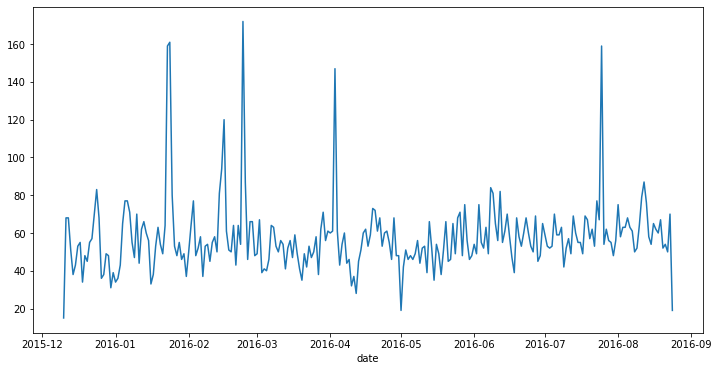

In [133]:
plt.figure(figsize = (12,6))
df[df["reason"]=="Fire"].groupby("date").count()["twp"].plot()

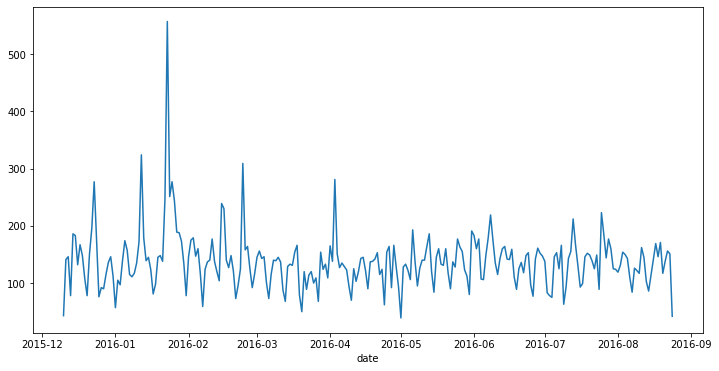

In [134]:
plt.figure(figsize = (12,6))
df[df["reason"]=="Traffic"].groupby("date").count()["twp"].plot()

Calls for traffic are very high around mid January, 2016.

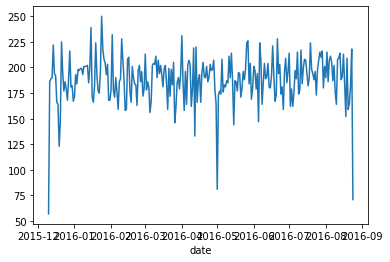

In [106]:
df[df["reason"]=="EMS"].groupby("date").count()["twp"].plot()

In [110]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,dayOfWeek,month,hour,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,12,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,12,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thu,12,17,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu,12,17,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu,12,17,2015-12-10


In [0]:
df.set_index("dayOfWeek")
# not inplace

In [115]:
# The stack method turns column names into index values, and the unstack method turns index values into column names.
# So by shifting the values into the index, we can use stack and unstack to perform the swap.
# https://stackoverflow.com/questions/24640399/how-to-unstack-or-pivot-in-pandas

dayVSHour = df.groupby(by=["dayOfWeek", "hour"]).count()["reason"].unstack()
dayVSHour.head()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
dayOfWeek,,,,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,803,859,885,890,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,793,822,893,842,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,697,769,801,831,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,643,693,771,679,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,837,773,889,936,876,969,935,1013,810,698,617,553,424,354


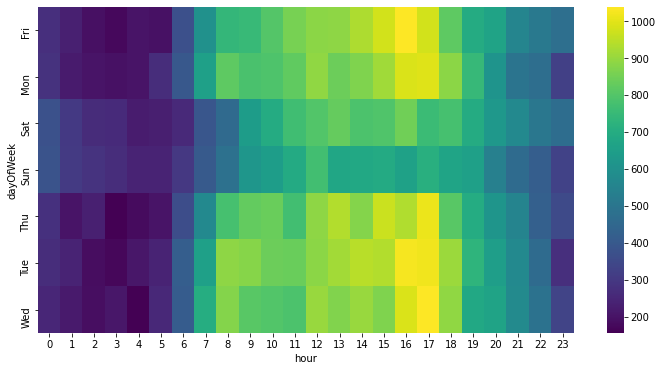

In [117]:
plt.figure(figsize = (12, 6))
sns.heatmap(dayVSHour, cmap = 'viridis')

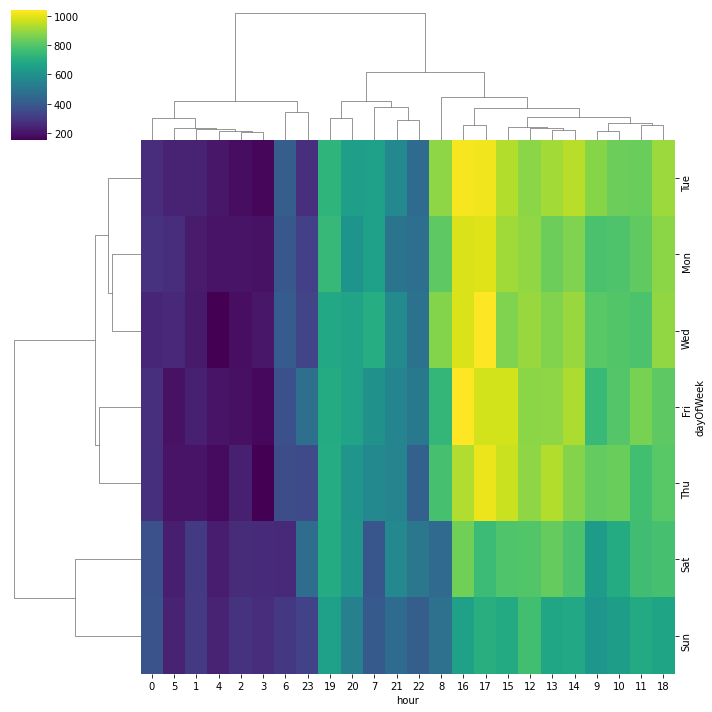

In [118]:
sns.clustermap(dayVSHour, cmap = "viridis")

In [119]:
dayVSMonth = df.groupby(by=["dayOfWeek", "month"]).count()["reason"].unstack()
dayVSMonth.head()

month,1,2,3,4,5,6,7,8,12
dayOfWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


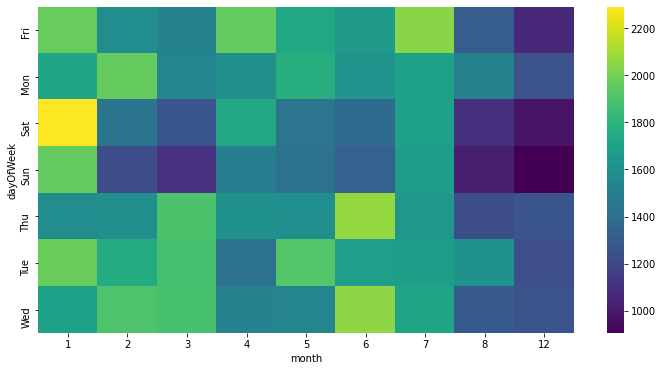

In [121]:
plt.figure(figsize = (12, 6))
sns.heatmap(dayVSMonth, cmap = 'viridis')

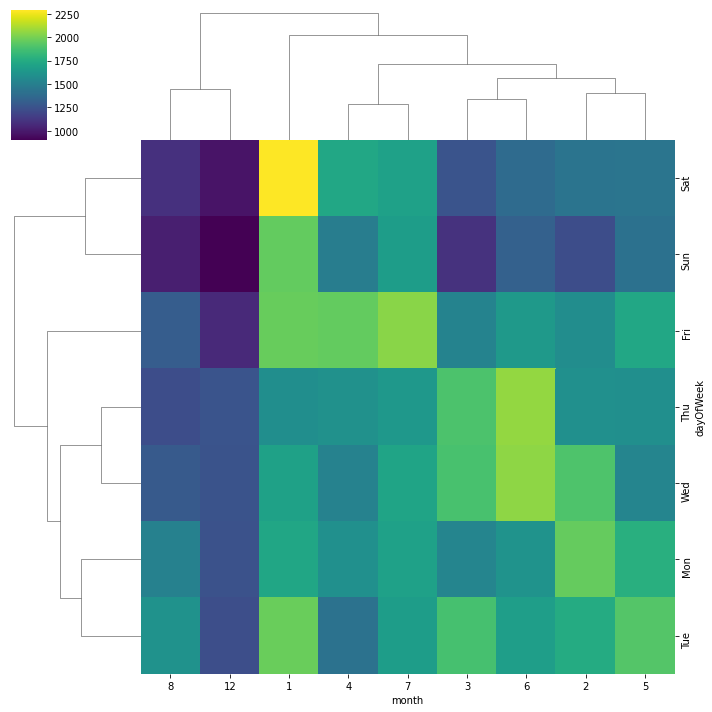

In [122]:
sns.clustermap(dayVSMonth, cmap = "viridis")